##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

## Problem statement

to predict whether a person has an income of more than 50K a year or not.

## Preparing The Dataset

In [2]:
df = pd .read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [6]:
df["workclass"].value_counts()                #datatye is Object

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
#Remove '?' by 'NaN' values from workclass column
df["workclass"].replace({" ?":np.nan}, inplace=True)

In [8]:
df["education"].value_counts()            #datatye is Object

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [9]:
df["marital-status"].value_counts()        #datatye is Object

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [10]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
#Remove '?' by 'NaN' values from occupation column
df["occupation"].replace({" ?":np.nan}, inplace=True)

In [12]:
df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [13]:
df["race"].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [14]:
df["sex"].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [15]:
df["country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [16]:
#Remove '?' by 'NaN' values from country column
df["country"].replace({" ?":np.nan},inplace=True)                           

In [17]:
df["salary"].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [18]:
df["salary"].replace({" <=50K":0," >50K":1}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         31978 non-null  object
 14  salary          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [20]:
df["salary"].unique()

array([0, 1], dtype=int64)

In [21]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [22]:
#Salary is not dependent on Features like 'marital-status' and 'relationship' so we can remove these features
df.drop(['marital-status','relationship'], axis=1, inplace=True)

In [23]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Adm-clerical,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,White,Male,0,0,13,United-States,0


In [24]:
df["workclass"].replace({' State-gov':0, ' Self-emp-not-inc':1, ' Private':2, ' Federal-gov':3,
                         ' Local-gov':4, ' Self-emp-inc':5, ' Without-pay':6, ' Never-worked':7}, inplace=True)

In [25]:
df["race"].replace({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4},inplace=True)

In [26]:
df["sex"].replace({' Male':0, ' Female':1}, inplace=True)

In [27]:
sorted_education = sorted(df['education'].unique())
print(sorted_education)

[' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool', ' Prof-school', ' Some-college']


In [28]:
# Apply Lable Encoder to 'education' Feature
lable_encoder = LabelEncoder()
df['education'] = lable_encoder.fit_transform(df['education'])

In [29]:
df = pd.get_dummies(df, columns=['occupation','country'], dtype=int)
df.head()

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39,0.0,77516,9,13,0,0,2174,0,40,...,0,0,0,0,0,0,0,1,0,0
1,50,1.0,83311,9,13,0,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
2,38,2.0,215646,11,9,0,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
3,53,2.0,234721,1,7,1,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
4,28,2.0,338409,9,13,1,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df.isna().sum()

age                            0
workclass                   1836
fnlwgt                         0
education                      0
education-num                  0
                            ... 
country_ Thailand              0
country_ Trinadad&Tobago       0
country_ United-States         0
country_ Vietnam               0
country_ Yugoslavia            0
Length: 66, dtype: int64

In [31]:
#To calculate how much % of missing value in 'workclass' feature
df["workclass"].isna().mean() * 100

5.638647461687294

In [32]:
# replace missing values by mode
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)

In [33]:
df.isna().sum()

age                         0
workclass                   0
fnlwgt                      0
education                   0
education-num               0
                           ..
country_ Thailand           0
country_ Trinadad&Tobago    0
country_ United-States      0
country_ Vietnam            0
country_ Yugoslavia         0
Length: 66, dtype: int64

In [34]:
df['workclass'] = df['workclass'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   age                                  32561 non-null  int64
 1   workclass                            32561 non-null  int32
 2   fnlwgt                               32561 non-null  int64
 3   education                            32561 non-null  int32
 4   education-num                        32561 non-null  int64
 5   race                                 32561 non-null  int64
 6   sex                                  32561 non-null  int64
 7   capital-gain                         32561 non-null  int64
 8   capital-loss                         32561 non-null  int64
 9   hours-per-week                       32561 non-null  int64
 10  salary                               32561 non-null  int64
 11  occupation_ Adm-clerical             32561 non-null  i

### check correlation

<AxesSubplot:>

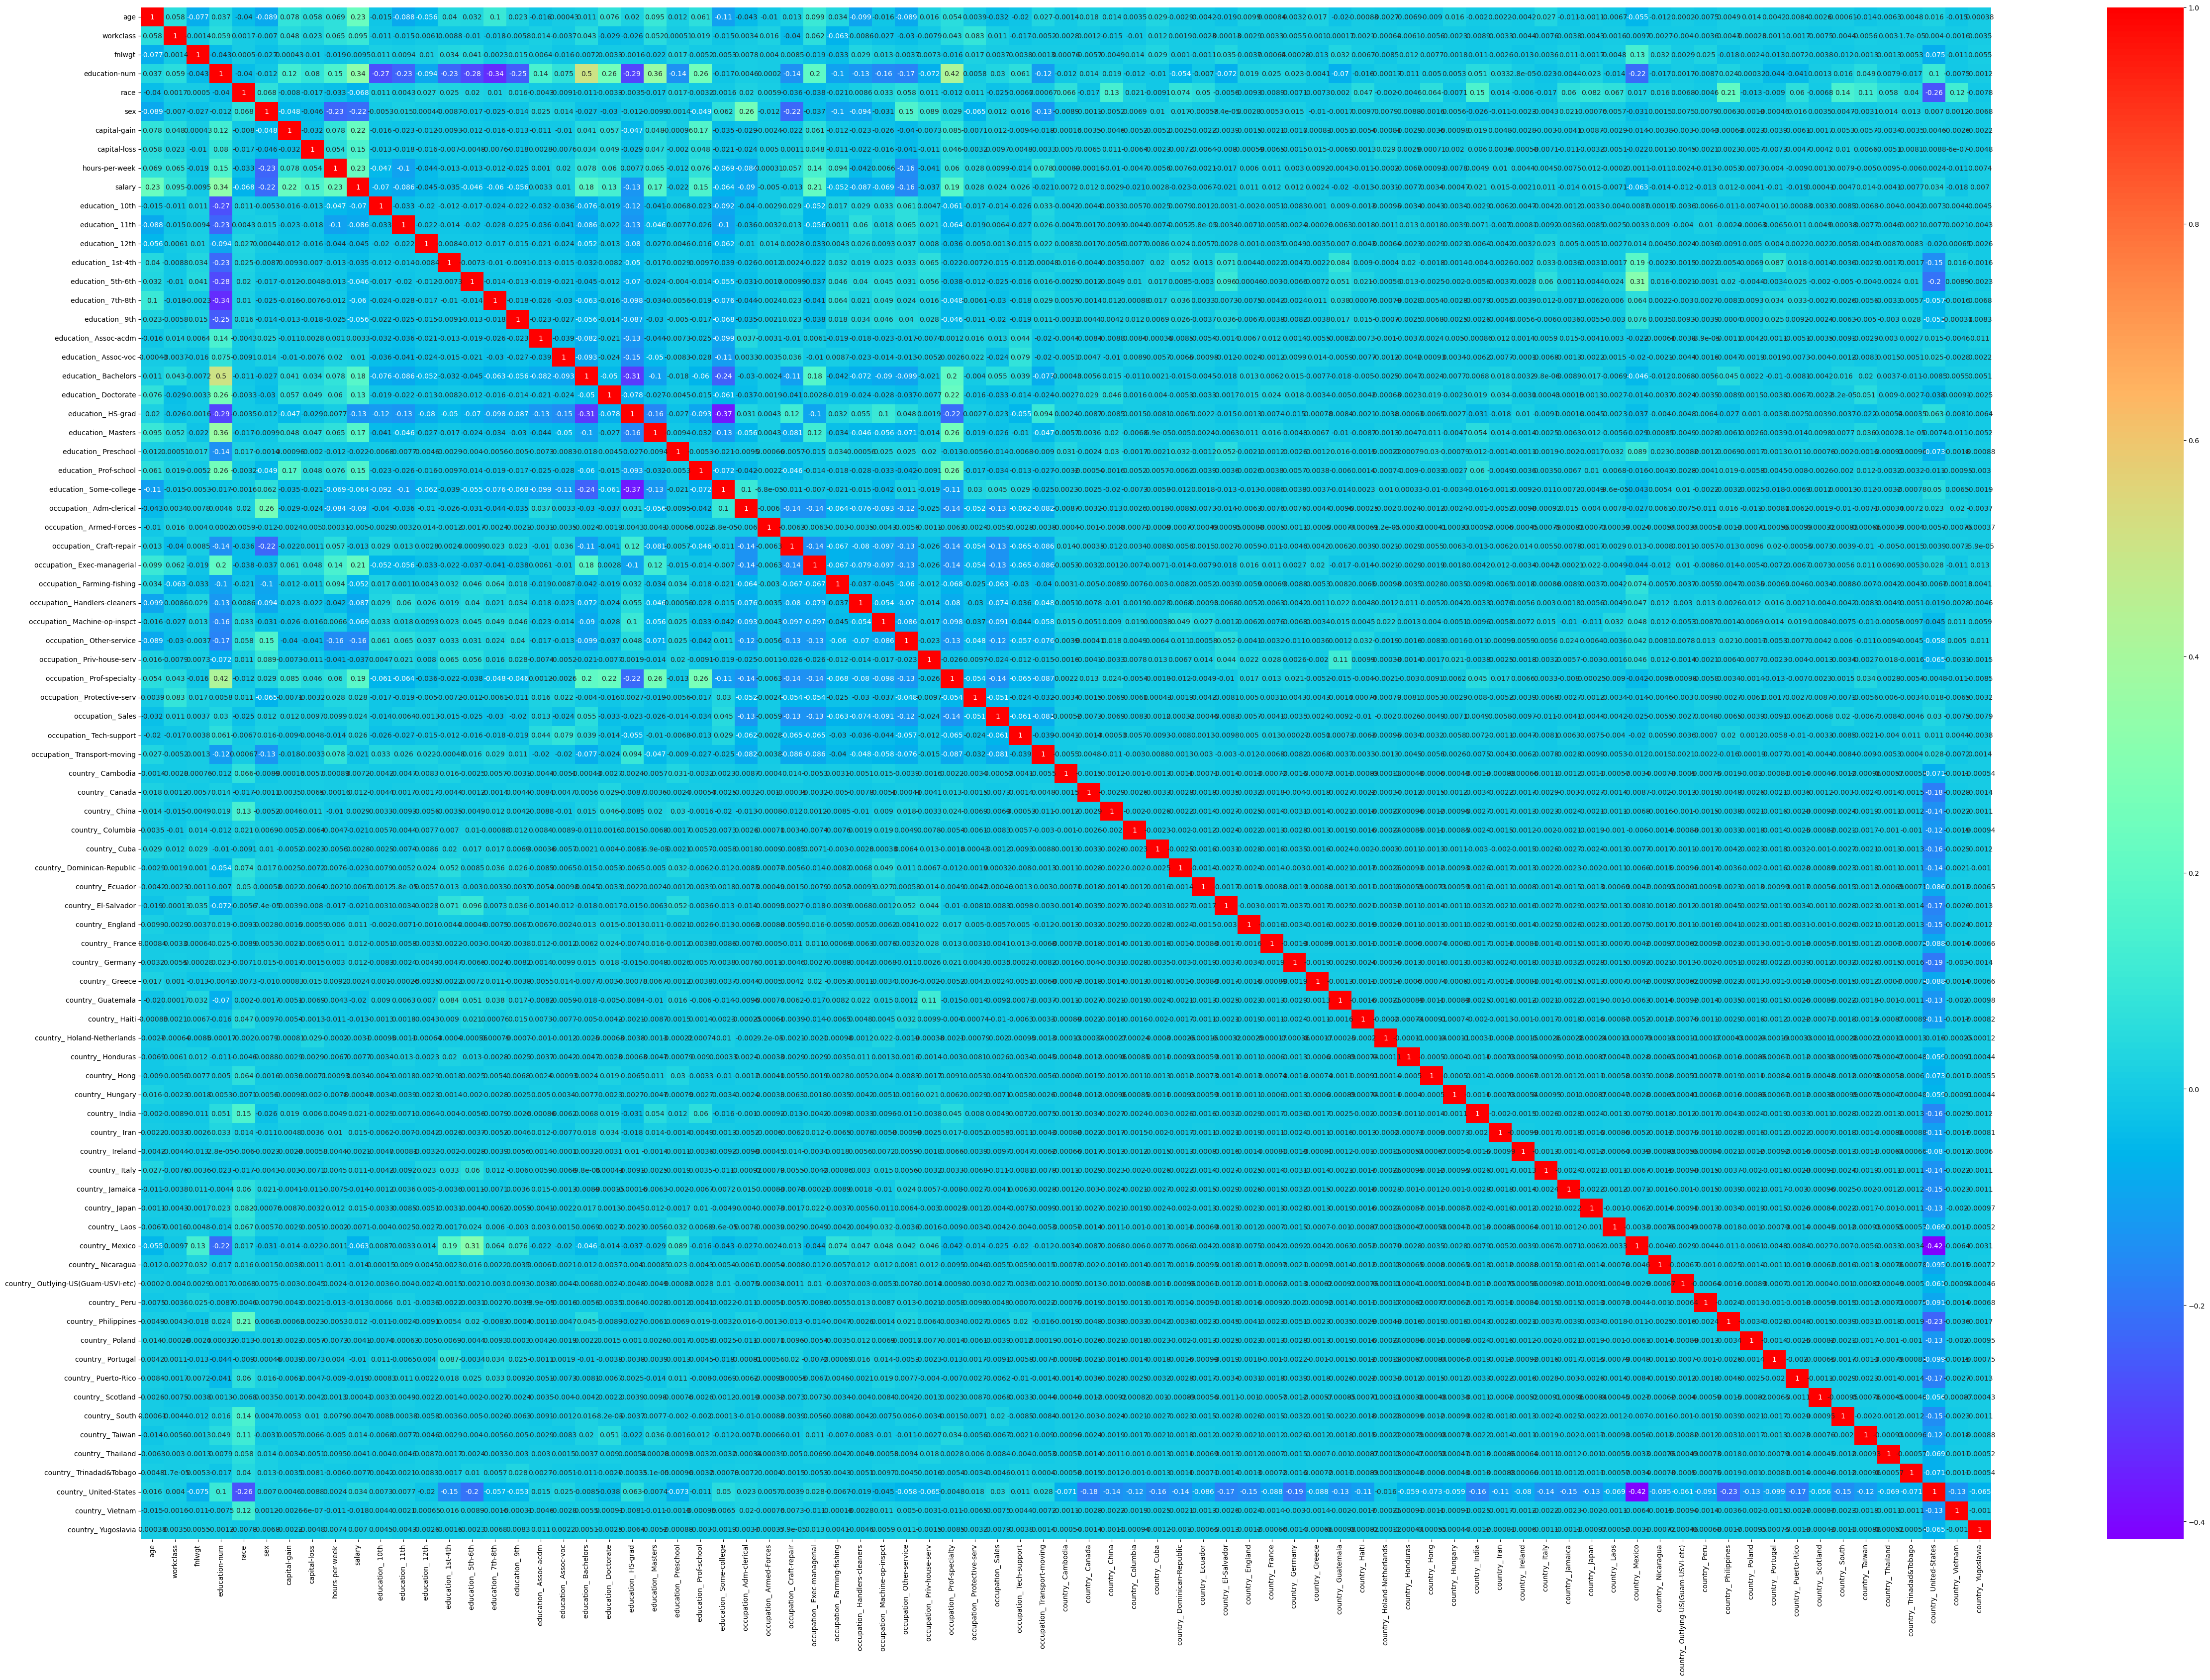

In [34]:
plt.figure(figsize=(60,40))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

### Train Test split

In [36]:
df = df.select_dtypes(exclude=object) 
x = df.drop('salary',axis = 1)
y = df['salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=34)

In [37]:
x_train.head()

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
2603,24,2,161708,11,9,0,1,0,0,45,...,0,0,0,0,0,0,0,1,0,0
17886,20,2,213719,11,9,1,1,0,0,20,...,0,0,0,0,0,0,0,1,0,0
25789,59,2,354037,14,15,1,0,15024,0,50,...,0,0,0,0,0,0,0,1,0,0
1293,46,2,279661,12,14,1,0,0,0,35,...,0,0,0,0,0,0,0,1,0,0
2938,47,2,239439,1,7,1,1,0,0,40,...,0,0,0,0,0,0,0,1,0,0


In [38]:
x_test.head()

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
9217,47,2,212120,9,13,0,0,0,0,45,...,0,0,0,0,0,0,0,1,0,0
17355,27,2,238859,8,11,0,0,0,0,40,...,0,0,0,0,0,0,0,1,0,0
12279,29,4,219906,9,13,0,1,0,0,25,...,0,0,0,0,0,0,0,1,0,0
22843,59,2,99131,11,9,0,1,0,0,40,...,0,0,0,0,0,0,0,1,0,0
4314,48,2,177775,11,9,0,1,0,0,40,...,0,0,0,0,0,0,0,1,0,0


### Standardize the dataset (scalling)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()                      #scalling instance

In [40]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)            

In [41]:
x_train

array([[-1.06872017, -0.1154299 , -0.2668358 , ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [-1.3616695 , -0.1154299 ,  0.23071167, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [ 1.49458649, -0.1154299 ,  1.57302129, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       ...,
       [ 0.24955183,  0.97951474, -1.51127366, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [-0.26310951, -2.30531917, -1.02338805, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [ 0.68897583, -0.1154299 , -1.49168209, ...,  0.34125431,
        -0.04296689, -0.0247917 ]])

In [42]:
x_test

array([[ 0.61573849, -0.1154299 ,  0.21541532, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [-0.84900817, -0.1154299 ,  0.47120586, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [-0.70253351,  2.07445938,  0.28989773, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       ...,
       [ 0.68897583, -0.1154299 , -1.28535836, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [ 1.71429849, -0.1154299 ,  0.73681132, ...,  0.34125431,
        -0.04296689, -0.0247917 ],
       [-0.99548284, -0.1154299 ,  2.83858131, ..., -2.93036594,
        -0.04296689, -0.0247917 ]])

# Model Training

### 1.Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logistic=LogisticRegression()                # model1

In [45]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [46]:
logistic.get_params()                   #bydefault parameters on which model trains

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [47]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, plot_confusion_matrix

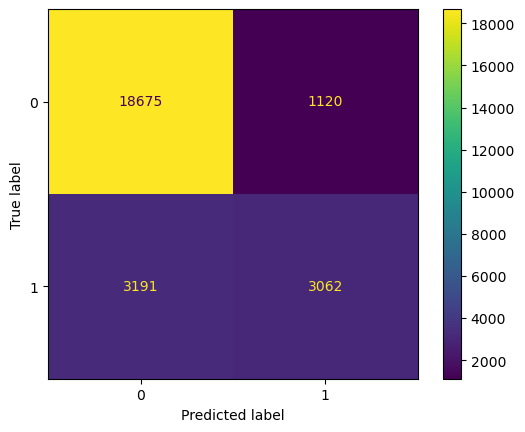

In [48]:
plot_confusion_matrix(logistic, x_train, y_train)

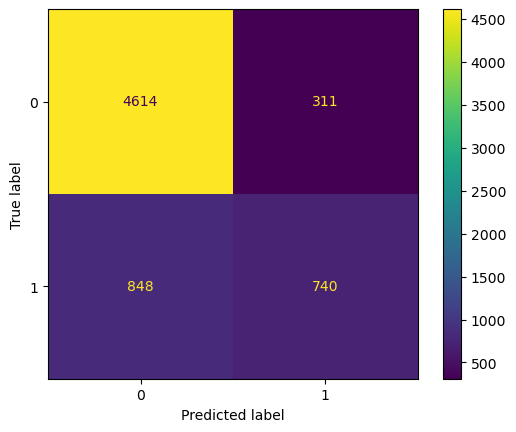

In [49]:
plot_confusion_matrix(logistic,x_test,y_test)

## Evaluation

In [50]:
# On Training Data Evaluation
y_pred_train = logistic.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train1 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train1)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18675  1120]
 [ 3191  3062]]
Accuracy : 0.8344978501228502
classification report :               precision    recall  f1-score   support

           0       0.85      0.94      0.90     19795
           1       0.73      0.49      0.59      6253

    accuracy                           0.83     26048
   macro avg       0.79      0.72      0.74     26048
weighted avg       0.82      0.83      0.82     26048



In [51]:
# On Testing Data Evaluation
y_pred = logistic.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy1 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy1)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4614  311]
 [ 848  740]]
Accuracy : 0.8220482112697681
classification report :               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4925
           1       0.70      0.47      0.56      1588

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



In [52]:
# Hypertuning of logistic regression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
hyperparamers = {'solver':['newton-cg', 'lbfgs', 'liblinear'], 'penalty':['l1','l2'], 'C':[100, 10, 1.0, 0.1, 0.01]}
grid_hypertune_model = GridSearchCV(model,hyperparamers,cv=5, n_jobs=-1, scoring='accuracy',error_score=0)
grid_hypertune_model.fit(x_train,y_train)
grid_hypertune_model.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [53]:
# Evaluation
# On Training Data Evaluation
logistic_hypertune_mode = grid_hypertune_model.best_estimator_
y_pred_train = logistic_hypertune_mode.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train2 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train2)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18675  1120]
 [ 3190  3063]]
Accuracy : 0.8345362407862408
classification report :               precision    recall  f1-score   support

           0       0.85      0.94      0.90     19795
           1       0.73      0.49      0.59      6253

    accuracy                           0.83     26048
   macro avg       0.79      0.72      0.74     26048
weighted avg       0.82      0.83      0.82     26048



In [54]:
# On Testing Data Evaluation
y_pred = logistic_hypertune_mode.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy2 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy2)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4614  311]
 [ 848  740]]
Accuracy : 0.8220482112697681
classification report :               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4925
           1       0.70      0.47      0.56      1588

    accuracy                           0.82      6513
   macro avg       0.77      0.70      0.72      6513
weighted avg       0.81      0.82      0.81      6513



### 2. k_Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
# Evaluation
# On Training Data Evaluation
y_pred_train = knn_model.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train3 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train3)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18732  1063]
 [ 2513  3740]]
Accuracy : 0.8627149877149877
classification report :               precision    recall  f1-score   support

           0       0.88      0.95      0.91     19795
           1       0.78      0.60      0.68      6253

    accuracy                           0.86     26048
   macro avg       0.83      0.77      0.79     26048
weighted avg       0.86      0.86      0.86     26048



In [57]:
# On Testing Data Evaluation
y_pred = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy3 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy3)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4484  441]
 [ 838  750]]
Accuracy : 0.8036235221863964
classification report :               precision    recall  f1-score   support

           0       0.84      0.91      0.88      4925
           1       0.63      0.47      0.54      1588

    accuracy                           0.80      6513
   macro avg       0.74      0.69      0.71      6513
weighted avg       0.79      0.80      0.79      6513



In [58]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Hypertuning of k_Nearest Neighbors
model = KNeighborsClassifier()
hyperparamers = {'weights':['uniform', 'distance'],'n_neighbors':np.arange(1,30),'p':[1,2]}
grid_hypertune_model = GridSearchCV(model,hyperparamers,cv=5, n_jobs=-1, scoring='accuracy', error_score=0)
grid_hypertune_model.fit(x_train,y_train)
grid_hypertune_model.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'uniform'}

In [60]:
# Evaluation
# On Training Data Evaluation
knn_hypertune_model = grid_hypertune_model.best_estimator_
y_pred_train = knn_hypertune_model.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train4 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train4)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18757  1038]
 [ 3315  2938]]
Accuracy : 0.8328854422604423
classification report :               precision    recall  f1-score   support

           0       0.85      0.95      0.90     19795
           1       0.74      0.47      0.57      6253

    accuracy                           0.83     26048
   macro avg       0.79      0.71      0.74     26048
weighted avg       0.82      0.83      0.82     26048



In [61]:
# On Testing Data Evaluation
y_pred = knn_hypertune_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy4 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy4)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4633  292]
 [ 929  659]]
Accuracy : 0.8125287885766928
classification report :               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4925
           1       0.69      0.41      0.52      1588

    accuracy                           0.81      6513
   macro avg       0.76      0.68      0.70      6513
weighted avg       0.80      0.81      0.79      6513



### 3. Adabboost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(x_train,y_train)

AdaBoostClassifier()

In [67]:
adaboost_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [68]:
# Evaluation
# On Training Data Evaluation
y_pred_train = adaboost_model.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train5 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train5)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18743  1052]
 [ 2883  3370]]
Accuracy : 0.8489327395577395
classification report :               precision    recall  f1-score   support

           0       0.87      0.95      0.90     19795
           1       0.76      0.54      0.63      6253

    accuracy                           0.85     26048
   macro avg       0.81      0.74      0.77     26048
weighted avg       0.84      0.85      0.84     26048



In [69]:
# On Testing Data Evaluation
y_pred = adaboost_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy5 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy5)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4633  292]
 [ 755  833]]
Accuracy : 0.8392445877475817
classification report :               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4925
           1       0.74      0.52      0.61      1588

    accuracy                           0.84      6513
   macro avg       0.80      0.73      0.76      6513
weighted avg       0.83      0.84      0.83      6513



In [88]:
# RandomSearchCV Hypertuning of Adaboost
from sklearn.model_selection import RandomizedSearchCV
model = AdaBoostClassifier(random_state=23)
hyperparameters = {'n_estimators' : list(range(1, 100)),'learning_rate':np.arange(0,2,0.001)}
random_hypertune_model = RandomizedSearchCV(model,hyperparameters,cv=5, n_jobs=-1, scoring='accuracy', error_score=0)
random_hypertune_model.fit(x_train,y_train)
random_hypertune_model.best_params_

{'n_estimators': 79, 'learning_rate': 1.697}

In [89]:
# # Evaluation
# # On Training Data Evaluation
adaboost_hypertune_model = random_hypertune_model.best_estimator_
y_pred_train = adaboost_hypertune_model.predict(x_train)

cnf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix_train)

accuracy_train6 = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy_train6)

clf_report_train = classification_report(y_train, y_pred_train)
print("classification report :",clf_report_train)

Confusion Matrix :
 [[18772  1023]
 [ 2796  3457]]
Accuracy : 0.8533860565110565
classification report :               precision    recall  f1-score   support

           0       0.87      0.95      0.91     19795
           1       0.77      0.55      0.64      6253

    accuracy                           0.85     26048
   macro avg       0.82      0.75      0.78     26048
weighted avg       0.85      0.85      0.84     26048



In [90]:
# # On Testing Data Evaluation
y_pred = adaboost_hypertune_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

accuracy6 = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy6)

clf_report = classification_report(y_test, y_pred)
print("classification report :",clf_report)

Confusion Matrix :
 [[4662  263]
 [ 721  867]]
Accuracy : 0.8489175495163519
classification report :               precision    recall  f1-score   support

           0       0.87      0.95      0.90      4925
           1       0.77      0.55      0.64      1588

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.77      6513
weighted avg       0.84      0.85      0.84      6513



# Model Selection

In [91]:
model_accuracy = {"Training Accuracy":[accuracy_train1,accuracy_train3,accuracy_train5],
                  "Testing Accuracy":[accuracy1,accuracy3,accuracy5],
                  "Training_Hyperparametere_Accuracy":[accuracy_train2,accuracy_train4,accuracy_train6],
                  "Testing_Hyperparameter_Accuracy":[accuracy2,accuracy4,accuracy6]}

In [93]:
mpdel_Performance = pd.DataFrame(model_accuracy,index=['Logistic','KNN','Adaboost'])
mpdel_Performance

,Training Accuracy,Testing Accuracy,Training_Hyperparametere_Accuracy,Testing_Hyperparameter_Accuracy
Logistic,0.834498,0.822048,0.834536,0.822048
KNN,0.862715,0.803624,0.832885,0.812529
Adaboost,0.848933,0.839245,0.853386,0.848918


In [ ]:
# from mpdel_Performance table we can say that adaboost is performing well for both training and testing data set.
# So we select Adaboost model for final prediction

In [94]:
#create Model File

import pickle

with open("Adaboost_model.pkl","wb") as f:
    pickle.dump(adaboost_hypertune_model,f)

In [95]:
with open("Scaling.pkl","wb") as f:
    pickle.dump(scaler,f)

# Predicting on single User Input

In [ ]:
occupation = [' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv']'

In [97]:
country = [' United-States', ' Cuba', ' Jamaica', ' India',' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands']

In [103]:
age          =   25   
workclass    =   ' Local-gov'             
fnlwgt       =   65098                 
education    =   ' Assoc-acdm'                        
education_num=   15                             
race         =   ' Asian-Pac-Islander'                       
sex          =   ' Male'                       
capital_gain =   2020 
capital_loss =   812
hours_per_week=  55
occupation   =   ' Transport-moving'
country      =   ' India'               

# salary = ?

In [104]:
label_encoded_data = {"workclass": {' State-gov':0,' Self-emp-not-inc':1,' Private':2,' Federal-gov':3,
                                    ' Local-gov':4,' Self-emp-inc':5,' Without-pay':6,' Never-worked':7},
                      "education": {' 10th':0, ' 11th':1, ' 12th':2, ' 1st-4th':3, ' 5th-6th':4, ' 7th-8th':5,
                                    ' 9th':6, ' Assoc-acdm':7, ' Assoc-voc':8, ' Bachelors':9, ' Doctorate':10,
                                    ' HS-grad':11, ' Masters':12, ' Preschool':13, ' Prof-school':14, ' Some-college':15},
                      "sex"      : {' Male':0, ' Female':1},
                      "race"     : {' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4},
                      "columns" : list(x.columns)
                     }

In [105]:
test_array = np.zeros(len(x.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [106]:
occupation = 'occupation_' + occupation
country    = 'country_' + country

occupation_index = np.where(x.columns ==  occupation)[0][0]
country_index = np.where(x.columns == country)[0][0]

test_array[occupation_index] =1
test_array[country_index] =1

In [107]:
test_array[0] =  age
test_array[1] =  label_encoded_data["workclass"][workclass]
test_array[2] =  fnlwgt
test_array[3] =  label_encoded_data["education"][education]
test_array[4] =  education_num
test_array[5] =  label_encoded_data["race"][race]
test_array[6] =  label_encoded_data["sex"][sex]
test_array[7] =  capital_gain
test_array[8] =  capital_loss
test_array[9] =  hours_per_week

test_array[occupation_index] =1
test_array[country_index] =1

In [108]:
test_array

array([2.5000e+01, 4.0000e+00, 6.5098e+04, 7.0000e+00, 1.5000e+01,
       2.0000e+00, 0.0000e+00, 2.0200e+03, 8.1200e+02, 5.5000e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [109]:
# Make Prediction on test array
np.around(adaboost_model.predict([test_array])[0],2)

1

In [ ]:
# # "salary" = {" <=50K":0," >50K":1}

# our model predicts 1 means salary is greater than 50K

In [40]:
import json
with open("project_data.json","w") as f:
    json.dump(label_encoded_data,f)